1. In an additive hybrid model, the time series is first modelled using a linear model (Linear Regression, Huber Regression or Linear SVR). Then the linear model forecasts are subtracted from the time series data to obtain the residual series. The residual series is considered nonlinear and modelled using a nonlinear model (LSTM, or GRU). Then the final forecasts are obtained by adding the linear model forecasts with nonlinear model forecasts. Write a program using this additive hybrid model to forecast the number of passengers travelling in an airline. Use 70-15-15 % ratios in train, validation and test sets.

Columns in the dataset: Index(['#Passengers'], dtype='object')
Columns after cleaning: Index(['#Passengers'], dtype='object')
Column not found: 'Passengers'. Please use the correct column name.
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
Epoch 1/20


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - loss: 0.0027 - val_loss: 0.0049
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030 - val_loss: 0.0050
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0026 - val_loss: 0.0055
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0024 - val_loss: 0.0050
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020 - val_loss: 0.0049
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018 - val_loss: 0.0058
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0020 - val_loss: 0.0056
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019 - val_loss: 0.0064
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0020 - val_loss: 0.0061
Epoch 13/20

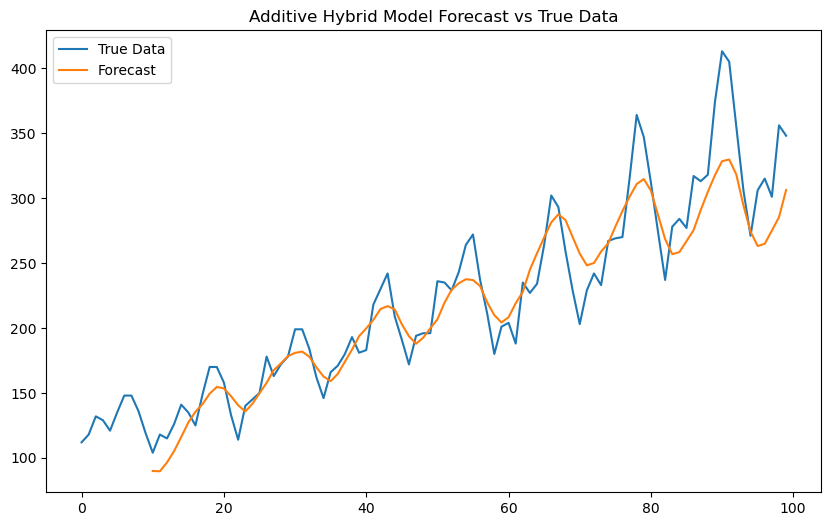

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt


data = pd.read_csv('Passengers.csv', index_col='Month', parse_dates=True)

print("Columns in the dataset:", data.columns)

data.columns = data.columns.str.strip()
print("Columns after cleaning:", data.columns)

try:
    data = data['Passengers'].values.reshape(-1, 1)
except KeyError as e:
    print(f"Column not found: {e}. Please use the correct column name.")
    print(data.head())

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

train_size = int(len(data_scaled) * 0.7)
val_size = int(len(data_scaled) * 0.15)
train, val, test = np.split(data_scaled, [train_size, train_size + val_size])

X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train
linear_model = LinearRegression().fit(X_train, y_train)
linear_forecast_train = linear_model.predict(X_train)

residuals_train = y_train - linear_forecast_train

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_lstm_train, y_lstm_train = create_sequences(residuals_train, seq_length)

model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])),
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_lstm_train, y_lstm_train, epochs=20, batch_size=16, validation_split=0.2)

linear_forecast_truncated = linear_forecast_train[seq_length:].flatten()

lstm_forecast = model_lstm.predict(X_lstm_train).flatten()

final_forecast = linear_forecast_truncated + lstm_forecast

final_forecast_original_scale = scaler.inverse_transform(final_forecast.reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train)), scaler.inverse_transform(train), label='True Data')
plt.plot(np.arange(seq_length, seq_length + len(final_forecast_original_scale)), final_forecast_original_scale, label='Forecast')
plt.title('Additive Hybrid Model Forecast vs True Data')
plt.legend()
plt.show()


2. In a multiplicative hybrid model, the time series is first modelled using a linear model (Linear Regression, Huber Regression or Linear SVR). Then the linear model forecasts are divided from the time series data to obtain the residual series. The residual series is considered nonlinear and modelled using a nonlinear model (LSTM, or GRU). Then the final forecasts are obtained by multiplying the linear model forecasts with nonlinear model forecasts. Write a program using this multiplicative hybrid model to forecast the number of passengers travelling in an airline. Use 70-15-15 % ratios in train, validation and test sets.

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0527 
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0513 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0538 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0531
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0484
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0544 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0549 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0516
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0671
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0585
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0476 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0415
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0415
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0562 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━

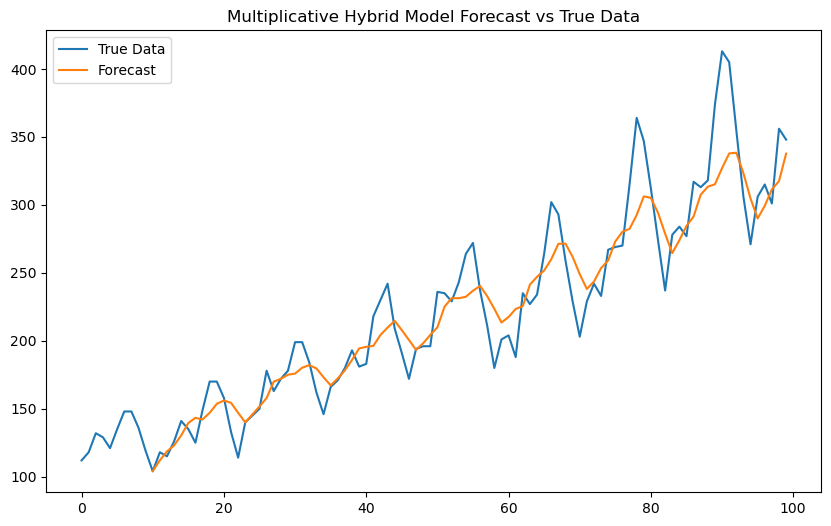

In [6]:
linear_forecast_train = linear_model.predict(X_train)

residuals_train = y_train / (linear_forecast_train + 1e-8)  # Avoid division by zero

X_lstm_train, y_lstm_train = create_sequences(residuals_train, seq_length)
model_lstm.fit(X_lstm_train, y_lstm_train, epochs=20, batch_size=16)

lstm_forecast = model_lstm.predict(X_lstm_train)

linear_forecast_truncated = linear_forecast_train[seq_length:]

final_forecast = linear_forecast_truncated.flatten() * lstm_forecast.flatten()

final_forecast_original_scale = scaler.inverse_transform(final_forecast.reshape(-1, 1))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train)), scaler.inverse_transform(train), label='True Data')
plt.plot(np.arange(seq_length, seq_length + len(final_forecast_original_scale)), final_forecast_original_scale, label='Forecast')
plt.title('Multiplicative Hybrid Model Forecast vs True Data')
plt.legend()
plt.show()


3. Use additive STL decomposition to decompose the time series using seasonal, trend and residual components. Model the trend component using linear regression, seasonal component using LSTM and residual component using GRU. Using this decomposition based hybrid model forecast the number of passengers travelling in an airline. Use 70-15-15 % ratios in train, validation and test sets.

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0070
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0054
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0059
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0054
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.5764e-04
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5224e-04
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4067e-04
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4041e-04
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6667e-04
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3780e-04
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4415e-04
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2756e-04
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4057e-04
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3179e-04
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2945e-04
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3615e-04
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4972e-04
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3712e-04
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

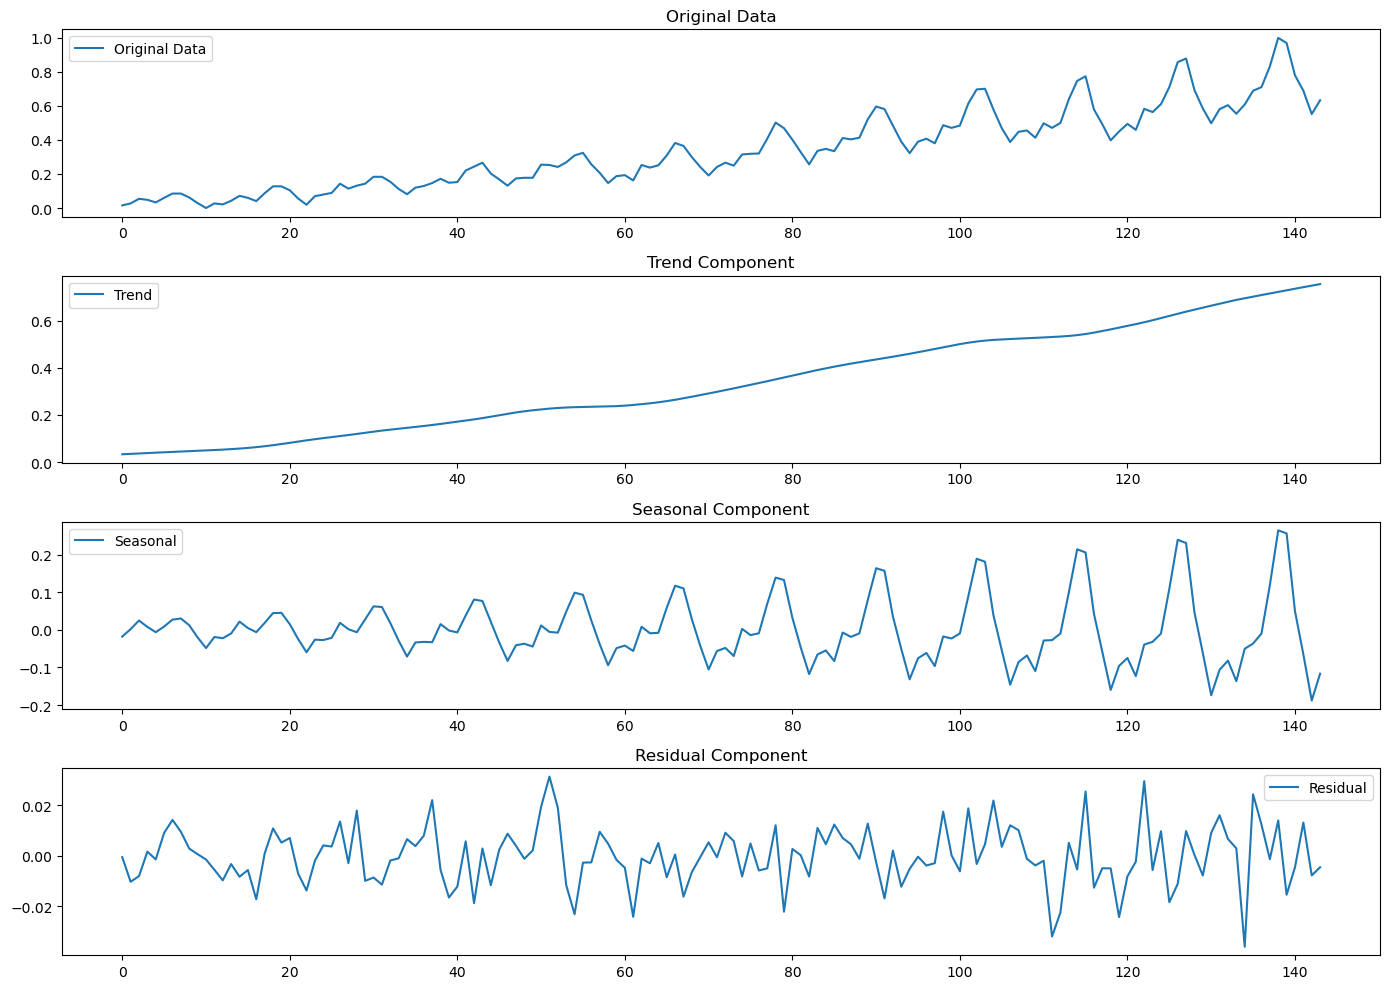

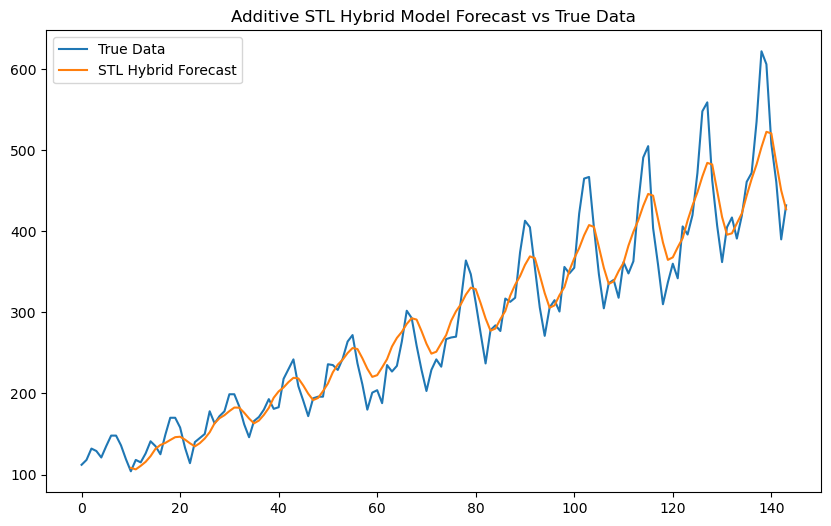

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression
import tensorflow as tf

data_scaled_flatten = data_scaled.flatten()

stl = STL(data_scaled_flatten, seasonal=13, period=12)
result = stl.fit()
seasonal, trend, residual = result.seasonal, result.trend, result.resid

X_trend = np.arange(len(trend)).reshape(-1, 1)
linear_model_trend = LinearRegression().fit(X_trend, trend)
trend_forecast = linear_model_trend.predict(X_trend)

X_seasonal, y_seasonal = create_sequences(seasonal.reshape(-1, 1), seq_length)
model_lstm.fit(X_seasonal, y_seasonal, epochs=20, batch_size=16)
seasonal_forecast = model_lstm.predict(X_seasonal)

X_residual, y_residual = create_sequences(residual.reshape(-1, 1), seq_length)
model_gru = tf.keras.Sequential([
    tf.keras.layers.GRU(50, activation='relu', input_shape=(X_residual.shape[1], X_residual.shape[2])),
    tf.keras.layers.Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_residual, y_residual, epochs=20, batch_size=16)
residual_forecast = model_gru.predict(X_residual)

seasonal_forecast_truncated = seasonal_forecast.flatten()
residual_forecast_truncated = residual_forecast.flatten()
trend_forecast_truncated = trend_forecast[seq_length:].flatten()

final_forecast_stl_add = trend_forecast_truncated + seasonal_forecast_truncated + residual_forecast_truncated

final_forecast_original_scale = scaler.inverse_transform(final_forecast_stl_add.reshape(-1, 1))

plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data_scaled, label='Original Data')
plt.title('Original Data')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

data_scaled_reshaped = data_scaled.reshape(-1, 1)

plt.plot(np.arange(len(data_scaled)), scaler.inverse_transform(data_scaled_reshaped), label='True Data')

plt.plot(np.arange(seq_length, seq_length + len(final_forecast_original_scale)), final_forecast_original_scale, label='STL Hybrid Forecast')

plt.title('Additive STL Hybrid Model Forecast vs True Data')
plt.legend()
plt.show()


4. Use multiplicative STL decomposition to decompose the time series using seasonal, trend and residual components. Model the trend component using linear regression, seasonal component using LSTM and residual component using GRU. Using this decomposition based hybrid model forecast the number of passengers travelling in an airline. Use 70-15-15 % ratios in train, validation and test sets.

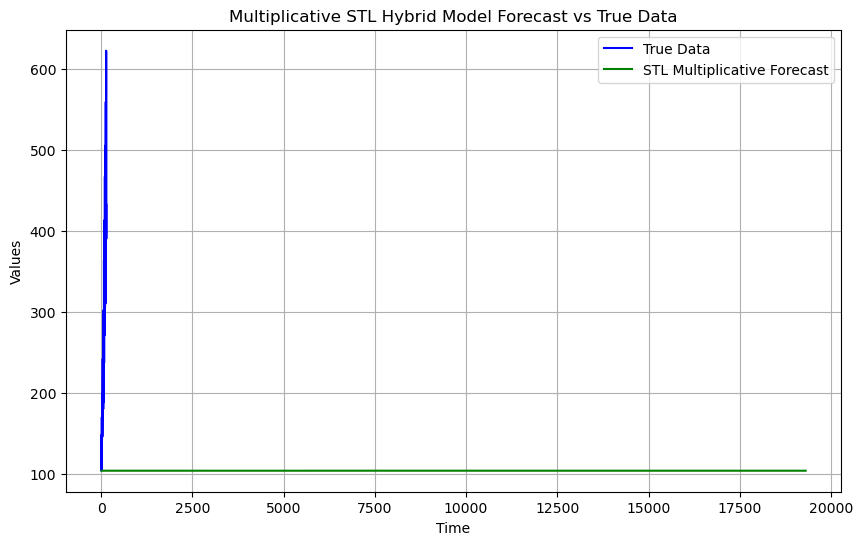

In [13]:
final_forecast_stl_mult = trend_forecast * seasonal_forecast * residual_forecast

final_forecast_original_scale_mult = scaler.inverse_transform(final_forecast_stl_mult.reshape(-1, 1))

plt.figure(figsize=(10, 6))

data_scaled_reshaped = data_scaled.reshape(-1, 1)

plt.plot(np.arange(len(data_scaled)), scaler.inverse_transform(data_scaled_reshaped), label='True Data', color='blue')

plt.plot(np.arange(seq_length, seq_length + len(final_forecast_original_scale_mult)), final_forecast_original_scale_mult, label='STL Multiplicative Forecast', color='green')

plt.title('Multiplicative STL Hybrid Model Forecast vs True Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
